# CS171 - Winter 2020 - Assignment 2
### Instructor: Vagelis Papalexakis
### TA: Yorgos Tsitsikas

### Credit for  Assignment 2: 20/35 points of the final grade

In this assignment we will implement two different supervised learning models: 1) linear regression (using gradient descent), and 2) k-nearest neighbor classification. As we did in Assignment 1, here we will also use the Iris dataset. Below are some useful imports and some data bookkeeping:

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split
from collections import Counter
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)

## Question 1: Linear Regression [50%]
The first model we will implement is Linear Regression using Gradient Descent. 

###  Getting data
In order to properly test linear regression, we first need to find a set of correlated variables, so that we use one to predict the other. Consider the following scatterplots:

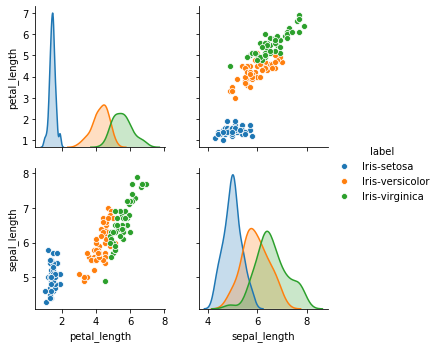

In [2]:
sb.pairplot(data[['petal_length','sepal_length','label']], hue = 'label')

We observe that sepal length and petal width for Iris-versicolor and Iris-virginica are reasonably correlated, so we are going to take those two variables for those two classes and use one to regress on the other.

In [3]:
sub_data = data.loc[data['label'] != 'Iris-setosa', :]
y = sub_data['petal_length'].values
x = sub_data['sepal_length'].values
x = x.reshape(-1, 1)

### Question 1a: Gradient descent for linear regression [40%]
As we saw in class, here we will implement the gradient descent version of linear regression.
In particular, the function implemented should follow the following format:
```python
def linear_regression_gd(x,y,learning_rate = 0.00001,max_iter=10000,tol=pow(10,-5)):
```
Where 'x' is the training data feature(s), 'y' is the variable to be predicted, 'learning_rate' is the learning rate used, 'max_iter' defines the maximum number of iterations that gradient descent is allowed to run, and 'tol' is defining the tolerance for convergence (which we'll discuss next).

The return values for the above function should be (at the least) 1) 'theta' which are the regression parameters, 2) 'all_cost' which is an array where each position contains the value of the objective function $J(\theta)$ for a given iteration, 3) 'iters' which counts how many iterations did the algorithm need in order to converge to a solution.

Gradient descent is an iterative algorithm; it keeps updating the variables until a convergence criterion is met. In our case, our convergence criterion is whichever of the following two criteria happens first:

- The maximum number of iterations is met
- The relative improvement in the cost is not greater than the tolerance we have specified. For this criterion, you may use the following snippet into your code:
```python
np.absolute(all_cost[it] - all_cost[it-1])/all_cost[it-1] <= tol
```

In [4]:
'''
    https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
    https://towardsdatascience.com/linear-regression-with-gradient-descent-from-scratch-in-numpy-d894a800a2ca
    
    GOAL: Minimize the cost function (the error) of the linear regression model with Gradient Descent Algorithm
    
    Step 1: Initialize the variables (ho(x) = mX + c)
    m = 0
    c = 0
    L = learning_rate
    
    Step 2: Partial Derivative with respect of m and c
    Dm = ...
    Dc = ...
    
    Step 3: Update value of m and c using the following equations:
    m = m - L x Dm
    c = c - L x Dc

    Step 4: Repete Step 2 and Step 3 until Loss = 0 or Loss <= tolerance specified 
    (here using: np.absolute(all_cost[it] - all_cost[it-1])/all_cost[it-1] <= tol)
    
    '''

'\n    https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931\n    https://towardsdatascience.com/linear-regression-with-gradient-descent-from-scratch-in-numpy-d894a800a2ca\n    \n    GOAL: Minimize the cost function (the error) of the linear regression model with Gradient Descent Algorithm\n    \n    Step 1: Initialize the variables (ho(x) = mX + c)\n    m = 0\n    c = 0\n    L = learning_rate\n    \n    Step 2: Partial Derivative with respect of m and c\n    Dm = ...\n    Dc = ...\n    \n    Step 3: Update value of m and c using the following equations:\n    m = m - L x Dm\n    c = c - L x Dc\n\n    Step 4: Repete Step 2 and Step 3 until Loss = 0 or Loss <= tolerance specified \n    (here using: np.absolute(all_cost[it] - all_cost[it-1])/all_cost[it-1] <= tol)\n    \n    '

In [5]:
def linear_regression_gd(x,y,learning_rate = 0.00001,max_iter=10000,tol=pow(10,-5)):
    
    #ho(x)=b0 + b1xi
    b0, b1 = 0.0, 1.0

    all_cost = []
    iters = 0

    # run 10000 times
    for it in range(max_iter):
        # initialize to 0 -> cost of the iteration, J_b0, J_b1
        iteration_cost, cost_b0, cost_b1 = 0, 0, 0

        for i in range(len(x)):
            # make prediction
            y_pred = b0 + b1*x[i]
            # append squared error
            iteration_cost += (y[i] - y_pred)**2 
                
            # partial derivative of b0 and b1 for current row
            J_b0 = (-2/len(x)) * sum(y[i] - y_pred)
            J_b1 = (-2/len(x)) * sum(x[i] * (y[i] - y_pred))

            # increase cost of coeffs
            cost_b0 += J_b0
            cost_b1 += J_b1

            #Step 3: Update value of b0 and b1
            b0 = b0 - learning_rate * cost_b0
            b1 = b1 - learning_rate * cost_b1

        # keep track of errors with all_cost
        all_cost.append(iteration_cost)
        iters += 1
        
        #Step 4: Repete Step 2 and Step 3 until Loss = 0 or Loss <= tol
        if it > 1 and (np.absolute(all_cost[it] - all_cost[it-1])/all_cost[it-1] <= tol):
            break
            
    #print('Regression parameters (b0 and b1): ', [b0,b1])
    #print('# of iterations: ', iters)
    #minimum = array([23.88535673])
    #print('Last cost of all_cost: ', all_cost[-1])
    return ([b0,b1], iters, all_cost)

In [6]:
linear_regression_gd(x,y,learning_rate = 0.00001,max_iter=10000,tol=pow(10,-5))

([-0.04139295120560071, 0.7630111304618326],
 224,
 [array([200.2127023]),
  array([184.8978415]),
  array([170.83541946]),
  array([157.92651463]),
  array([146.07989103]),
  array([135.21140585]),
  array([125.24346273]),
  array([116.10450682]),
  array([107.72855869]),
  array([100.0547841]),
  array([93.02709665]),
  array([86.59379116]),
  array([80.70720501]),
  array([75.32340569]),
  array([70.40190229]),
  array([65.90537914]),
  array([61.79945001]),
  array([58.05243117]),
  array([54.63513194]),
  array([51.52066137]),
  array([48.68424974]),
  array([46.1030839]),
  array([43.75615523]),
  array([41.62411935]),
  array([39.68916662]),
  array([37.93490266]),
  array([36.34623806]),
  array([34.90928662]),
  array([33.61127141]),
  array([32.44043816]),
  array([31.38597526]),
  array([30.43794001]),
  array([29.58719053]),
  array([28.82532297]),
  array([28.14461354]),
  array([27.53796509]),
  array([26.99885779]),
  array([26.52130364]),
  array([26.0998045]),
  array(

### Question 1b: Convergence plots [10%]
After implementing gradient descent for linear regression, we would like to test that indeed our algorithm converges to a solution. In order see this, we are going to look at the value of the objective/loss function $J(\theta)$ as a function of the number of iterations, and ideally, what we would like to see is $J(\theta)$ drops as we run more iterations, and eventually it stabilizes. 

As we discussed in class, the learning rate plays a big role in how fast our algorithm converges: a larger learning rate means that the algorithm is making faster strides to the solution, whereas a smaller learning rate implies slower steps. In this question we are going to test two different values for the learning rate:
- 0.00001
- 0.000001

while keeping the default values for the max number of iterations and the tolerance.


- Plot the two convergence plots (cost vs. iterations) [5%]

- What do you observe? [5%]

<b>Important</b>: Remember that as we discussed in class, in reality, when we are running gradient descent, we should be checking convergence based on the <i>validation</i> error (i.e., we would have to split our training set into a e.g., 70/30 training'/validation subsets, use the new training' set to calculate the gradient descent updates and evaluate the error both on the training' set and the validation set, and as soon as the validation loss stops improving, we stop training. <b>In order to keep things simple, in this assignment we are only looking at the training loss</b>, but as long as you have a function 
```python
def compute_cost(x,theta,y):
```
that calculates the loss for a given x, y, and set of parameters you have, you can always compute it on the validation portion of x and y (that are <b>not</b> used for the updates).  

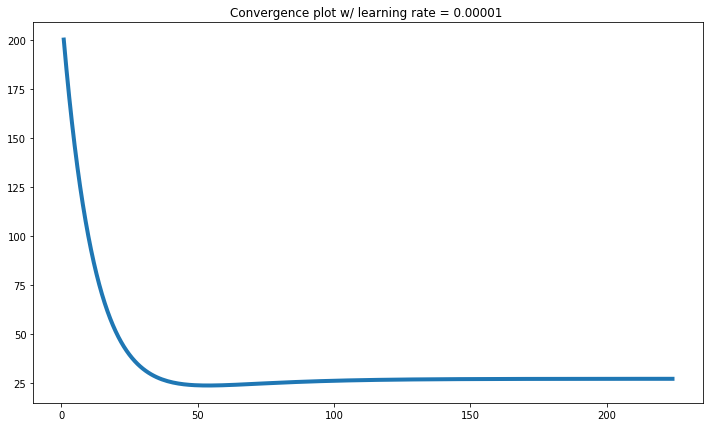

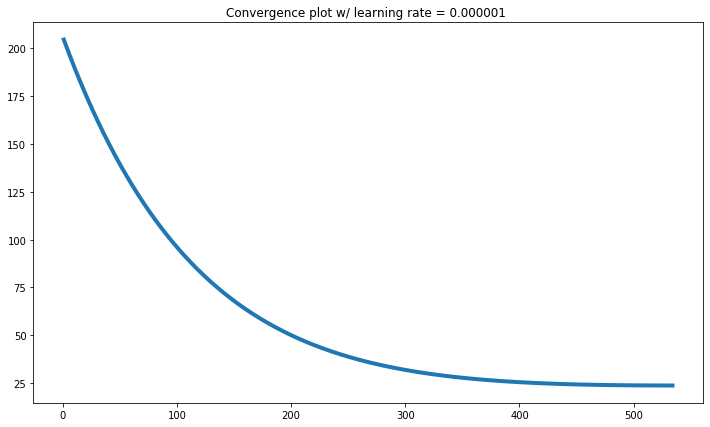

In [7]:
#Plot the two convergence plots (cost vs. iterations)
#LEARNING RATE = 0.00001
lr = linear_regression_gd(x,y,learning_rate = 0.00001,max_iter=10000,tol=pow(10,-5))

error = lr[2]
#print(error)
plt.figure(figsize=(12,7))
plt.title('Convergence plot w/ learning rate = 0.00001 ')
fig = plt.plot(np.arange(1, len(error)+1), error, linewidth=4)

#LEARNING RATE = 0.000001
lr2 = linear_regression_gd(x,y,learning_rate = 0.000001,max_iter=10000,tol=pow(10,-5))

error2 = lr2[2]
#print(error)
plt.figure(figsize=(12,7))
plt.title('Convergence plot w/ learning rate = 0.000001 ')
plt.plot(np.arange(1, len(error2)+1), error2, linewidth=4) 

### What do you observe?

We can see that both graphs tend to converge towards 25. With a smaller learning rate (second plot) we need more iterations (more than 300 against less than 50) to reach 25, the minimum. This can be explained because using a smaller learning rate means perform smaller step towards the minimum. It takes more time, more iterations to reach the minimum with a smaller learning rate. 

## Question 2: K-Nearest Neighbors Classifier [50%]
The K-Nearest Neighbors Classifier is one of the most popular instance-based (and in general) classification models. In this question, we will implement our own version and test in different scenarios.

### Question 2a: Implement the K-NN Classifier [30%]
For the implementation, your function should have the format:
```python
def knnclassify(test_data,training_data, training_labels, K=1):
```
where 'test_data' contains test data points, 'training_data' contains training data points, 'training_labels' holds the training labels, and 'K' is the number of neighbors. 

The output of this function should be 'pred_labels' which contains the predicted label for each test data point (it should, therefore, have the same number of rows as 'test_data').

The piece of code below prepares the Iris dataset by converting the labels from strings to integers (which is quite easier to move around and do calculations with):

In [8]:
all_vals = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_labels = data['label'].values
unique_labels = np.unique(all_labels)
print(unique_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = new_labels

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
#Step 1: Calculate Euclidean Distance.
#Step 2: Get Nearest Neighbors.
#Step 3: Make Predictions.

In [10]:
#Split dataset using scikit learn split function - keep 10 data points as test_set
(training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.066)

In [11]:
def knnclassify(test_data, training_data, training_labels, k=1):
    #training_labels = [0, 1, 2] => ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
    
    #contains the predicted label for each test data point
    pred_labels=[]
    
    #for each test_data point
    for i in range(len(test_data)):
        distances = []
            
        #compute euclidean distance with all points of the training set
        for j in range(len(training_data)):
            euclidean_distance = np.linalg.norm(test_data[i]-training_data[j])
            #Pair each distance with the training label of the training data point
            distances.append([euclidean_distance, training_labels[j]]) 
                 

        #sort pairs by distances to get the K nearest neighbor(s) at the top
        distances.sort(key=lambda d: d[0])
        
        #select number of k neighbors (default: k=1)
        k_nearests = distances[0:k]
        
        #Collect vote/class_label for each nearest neighbor (if k = 1, there are 1 vote, if k=3 there are 3 votes) 
        votes = [k_nearest[1] for k_nearest in k_nearests]
        
        #Store the most_common vote for each test data point into class_label_result
        class_label_result = Counter(votes).most_common(1)[0][0]
        
        #Append predicted label for the test data point into pred_labels
        pred_labels.append(class_label_result)
    
    return pred_labels

In [12]:
knnclassify(test_data, training_data, training_labels)

[1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 2.0, 1.0, 2.0, 1.0]

### Question 2b: Measuring performance [10%]

In this question you will have to evaluate the average performance of your classifier for different values of $K$. In particular, $K$ will range in $\{1,\cdots,8\}$. We are going to measure the performance using classification accuracy. For computing the accuracy, you may use
```python
accuracy = sum(test_labels == pred_labels)/len(test_labels)
```
where 'test_labels' are the actual class labels and 'pred_labels' are the predicted labels


In order to get a proper estimate for the accuracy for every K, we need to run multiple iterations where for each iteration we get a different randomized split of our data into train and test. In this question, we are going to run 100 iterations for every K, and for every random splitting, you may use:

```python
    (training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.3)
```
where the train/test ratio is 70/30. 

After computing the accuracy for every $K$ for every iteration, you will have 100 accuracies per $K$. The best way to store those accuracies is in a matrix that has as many rows as values for $K$ and 100 columns, each one for each iteration.

Compute average accuracy as a function of $K$. Because we have a randomized process, we also need to compute how certain/uncertain our estimation for the accuracy per $K$ is. For that reason, we also need to compute the standard deviation of the accuracy for every $K$. Having computed both average accuracy and standard deviation, make a figure that shows the average accuracy as a function of $K$ with each point of the figure being surrounded by an error-bar encoding the standard deviation. You may find 
```python
plt.errorbar()
```
useful for this plot.

In [13]:
def knn_accuracy():
    accuracies = []
    
    #for each value of k
    for i in range(1,9):
        #contains the accuracy for each k value
        k_accuracies = []


        for j in range(100):
            # for each iteration we get a different randomized split 
            (training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.3)
            
            #Get the pred_labels from our knn classifier (with k=i)
            pred_labels = knnclassify(test_data, training_data, training_labels, i)
            
            #Measure the performance using classification accuracy
            accuracy = sum(test_labels == pred_labels)/len(test_labels)
            k_accuracies.append(accuracy)
    
        accuracies.append(k_accuracies)
    
    #return a matrix (8,100) 
    return accuracies

In [14]:
accuracies = knn_accuracy()

[0.9544444444444444, 0.9555555555555554, 0.9606666666666664, 0.956888888888889, 0.9628888888888888, 0.9608888888888888, 0.9644444444444444, 0.9680000000000001]
[0.024419178862039894, 0.02474561939035565, 0.027008000643613587, 0.024709672220298014, 0.02201122048321022, 0.025554589353715632, 0.023517789431685237, 0.024609543466501547]


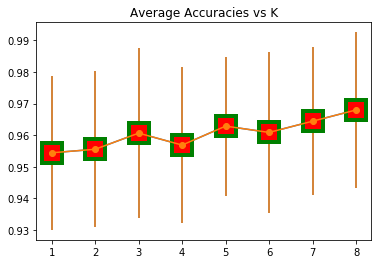

In [15]:
def mean_std_accuracy(accuracies):
    
    mean_accuracy = []
    std_accuracy = []
    #for each k value compute the accuracy of k
    for k in accuracies:
        k_mean = np.mean(k)
        mean_accuracy.append(k_mean)
        
        k_std = np.std(k)
        std_accuracy.append(k_std)
    
    print(mean_accuracy)
    print(std_accuracy)
    
    # Plot average accuracy as a function of K = {1, ..., 8}
    plt.errorbar(x=range(1,9), y=mean_accuracy, yerr=std_accuracy, marker='s', mfc='red', mec='green', ms=20, mew=4)
    
    plt.title("Average Accuracies vs K")
    
    plt.errorbar(x=range(1,9), y=mean_accuracy, yerr=std_accuracy, marker='o')
    
    return

mean_std_accuracy(accuracies)

### Question 2c: Feature selection [10%]

We have extensively discussed in class the fact that a good or bad set of features can make or break our model! Here we will see what happens when we operate on a subset of the features, and in particular in
- a subset that has good separability of classes
- a subset that has poor separability of classes

Recall from Assignment 1 where we did the scatterplots of the Iris dataset that a pair of features with high visual separability is (petal length, sepal width), whereas a set that confuses at least two classes is (sepal length, sepal width). 

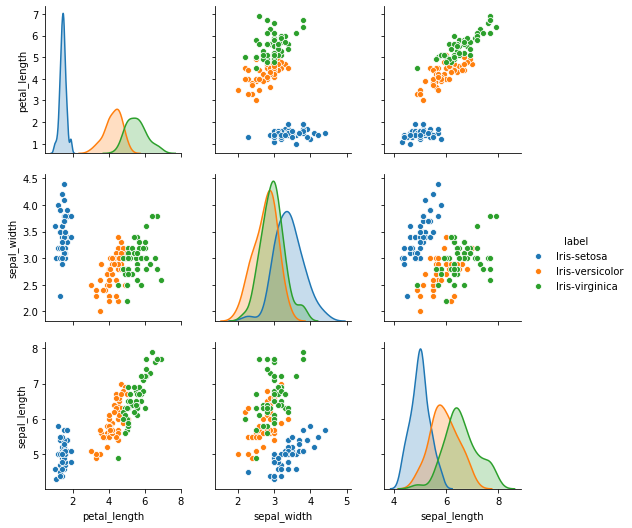

In [16]:
sb.pairplot(data[['petal_length','sepal_width','sepal_length','label']], hue = 'label')

Apply K-NN classification with K = 1 on two datasets (using the same train/test split for both datasets, and the same method you used to split as above) and measure the classification accuracy for:
- Only (petal length, sepal width) [2.5%]
- Only (sepal length, sepal width) [2.5%]

What do you observe regarding the classification accuracy? [5%]

In [17]:
#petal length, sepal width
dataset1 = data[['petal_length', 'sepal_width']].values

#Split train/test set
(d1_train, d1_test, d1_train_labels, d1_test_labels) = train_test_split(dataset1, all_labels, test_size=0.3, random_state = 123)

d1_pred_labels = knnclassify(d1_test, d1_train, all_labels)
d1_accuracy = sum(d1_test_labels == d1_pred_labels)/len(d1_test_labels)
print(d1_accuracy)

###################################################################################################################

#petal length, sepal width
dataset2 = data[['sepal_length', 'sepal_width']].values

#Split train/test set
(d2_train, d2_test, d2_train_labels, d2_test_labels) = train_test_split(dataset2, all_labels, test_size=0.3, random_state = 123)

d2_pred_labels = knnclassify(d2_test, d2_train, all_labels)
d2_accuracy = sum(d2_test_labels == d2_pred_labels)/len(d2_test_labels)
print(d2_accuracy)


0.37777777777777777
0.3333333333333333


We observe that the accuracy is lower with 2 attributes compare to 4 attributes. This can be explained by the fact that we have less information about the data points. 
We also observe that there is a better accuracy using 'petal_length', 'sepal_width' than 'sepal_length', 'sepal_width' that can be explained by the fact that we are using a good set of features for the first case and a bad one for the second case.